## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
# from datetime import datetime

import matplotlib.pyplot as plt # Intermediate Visualization
import seaborn as sns # Advanced Vizualization
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans # K-means clustering
from yellowbrick.cluster import SilhouetteVisualizer # Silhouette Analysis for k-means clustering

## LOAD PICKLES

In [2]:
# I have selected the relevant column in 1_cluster_seller_prep.ipynb and save it on pickle
# Load dfos_c.pkl into dfos_c DataFrame
dfos_c = pd.read_pickle('pickles/dfos_c.pkl')

# Load dfos.pkl into dfos DataFrame
dfos = pd.read_pickle('pickles/dfos.pkl')

In [3]:
dfos_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6661 entries, 0 to 6660
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   recency_day            6661 non-null   int64  
 1   order_freq             6661 non-null   int64  
 2   gmv                    6661 non-null   int64  
 3   aov                    6661 non-null   float64
 4   revenue                6661 non-null   int64  
 5   voucher_used           6661 non-null   int64  
 6   voucher_val            6661 non-null   float64
 7   buyer_count            6661 non-null   int64  
 8   num_of_buyer_province  6661 non-null   int64  
 9   num_of_buyer_city      6661 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 520.5 KB


## OUTLIERS

In [4]:
relevant_column = ['recency_day',
                   'order_freq',
                   'gmv',
                   'aov',
                   'revenue',
                   'voucher_used',
                   'voucher_val',
                   'buyer_count',
                   'num_of_buyer_province',
                   'num_of_buyer_city']
dfos_c.describe()

,recency_day,order_freq,gmv,aov,revenue,voucher_used,voucher_val,buyer_count,num_of_buyer_province,num_of_buyer_city
count,6661.000000,6661.000000,6.661000e+03,6.661000e+03,6.661000e+03,6661.000000,6.661000e+03,6661.000000,6661.000000,6661.000000
mean,69.669869,23.904369,5.631280e+08,5.227111e+07,3.649363e+06,0.774658,4.919401e+04,5.037982,1.546464,2.076415
std,84.726016,97.819734,2.161917e+09,5.777136e+08,1.294545e+07,15.252454,8.682105e+05,23.769588,1.606708,3.591116
min,1.000000,1.000000,1.101000e+03,1.000000e+03,8.000000e+00,0.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,11.000000,1.000000,4.380000e+06,1.043400e+06,3.284900e+04,0.000000,0.000000e+00,1.000000,1.000000,1.000000
50%,27.000000,4.000000,5.393379e+07,9.028000e+06,4.045030e+05,0.000000,0.000000e+00,1.000000,1.000000,1.000000
75%,95.000000,14.000000,2.962590e+08,4.290510e+07,2.061576e+06,0.000000,0.000000e+00,3.000000,2.000000,2.000000
max,363.000000,3686.000000,4.790148e+10,4.499040e+10,3.322746e+08,859.000000,4.286325e+07,1133.000000,31.000000,121.000000


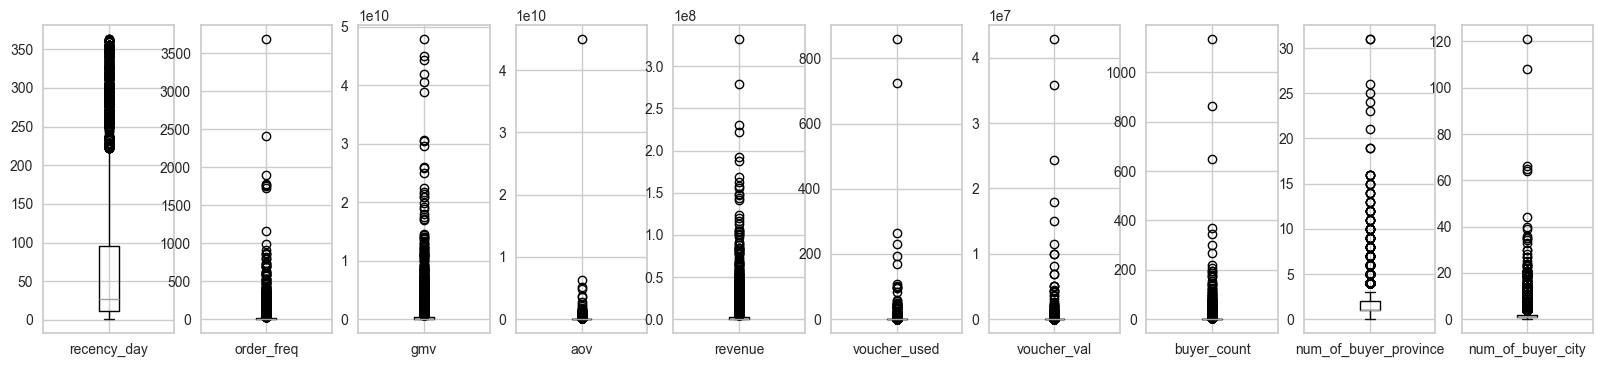

In [5]:
# We will not remove any outlier, let it be identified as their own cluster (hopefully)
# Plot
fig, axes = plt.subplots(nrows=1, ncols=10,figsize=(20,4))
for i,el in enumerate(relevant_column):
    a = dfos_c.boxplot(el, ax=axes.flatten()[i],grid=True)

plt.show()

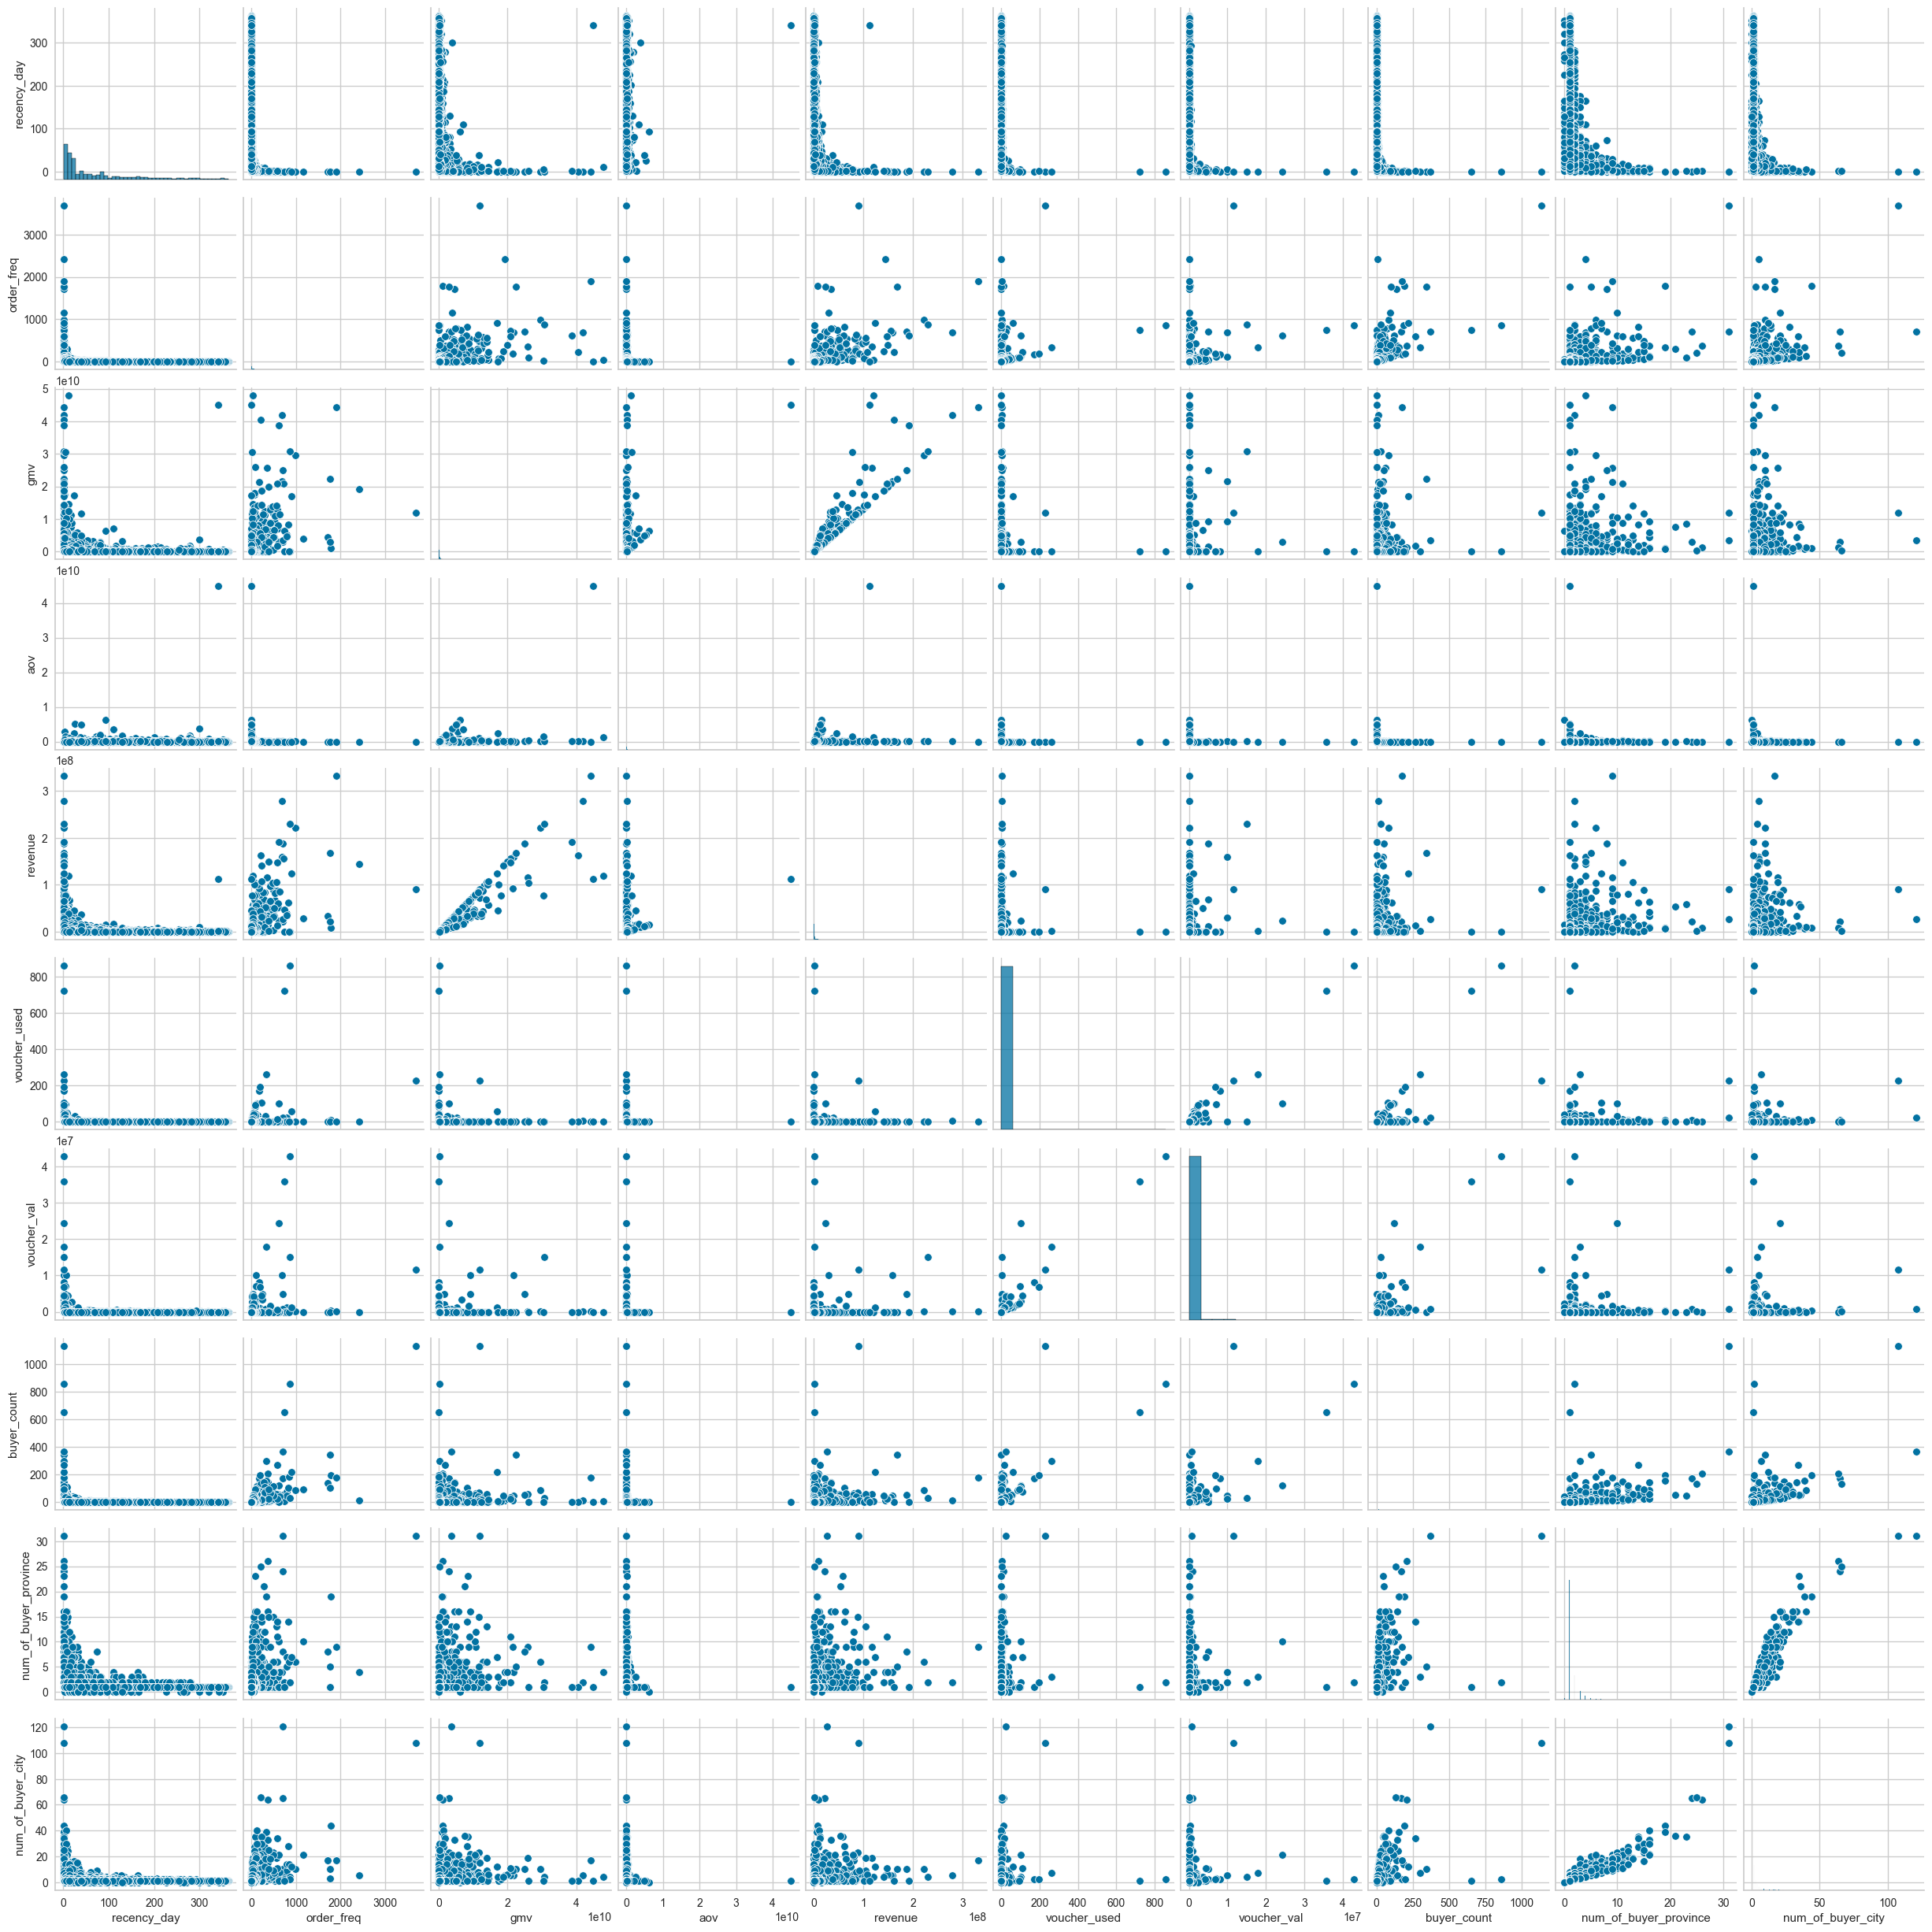

In [23]:
sns.pairplot(dfos_c)

## SCALE

In [7]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Create a copy of the dataframe to preserve the original data
dfos_cs = dfos_c.copy()
# Perform MinMax scaling on the selected columns
dfos_cs[relevant_column] = scaler.fit_transform(dfos_cs[relevant_column])

# Show the first few rows of the scaled dataframe
dfos_cs.head()

,recency_day,order_freq,gmv,aov,revenue,voucher_used,voucher_val,buyer_count,num_of_buyer_province,num_of_buyer_city
0,0.063536,0.000543,0.004284,0.001520,0.004632,0.0,0.0,0.0,0.032258,0.008264
1,0.049724,0.001085,0.034476,0.007341,0.024851,0.0,0.0,0.0,0.032258,0.008264
2,0.182320,0.000000,0.002201,0.002344,0.002380,0.0,0.0,0.0,0.032258,0.008264
3,0.024862,0.000543,0.005754,0.002042,0.006222,0.0,0.0,0.0,0.032258,0.008264
4,0.011050,0.000000,0.000770,0.000820,0.000832,0.0,0.0,0.0,0.032258,0.008264


## ELBOW METHOD

In [8]:
# For each n_clusters between 1 and 10, we calculate the distortion value
distortions = []
K = range(1,12)
for n_clusters in K:
  kmeanModel = KMeans(n_clusters, random_state = 1000, n_init='auto')
  kmeanModel.fit(dfos_cs)
  distortions.append(kmeanModel.inertia_)

distortions

[425.8220303537372,
 148.0718442277701,
 98.04520926732135,
 78.17600879891218,
 60.62544688060011,
 54.78494593906245,
 50.692287290362,
 40.935303072224556,
 37.35947220674855,
 33.57864688591455,
 30.736993139711103]

<Figure size 1600x800 with 0 Axes>

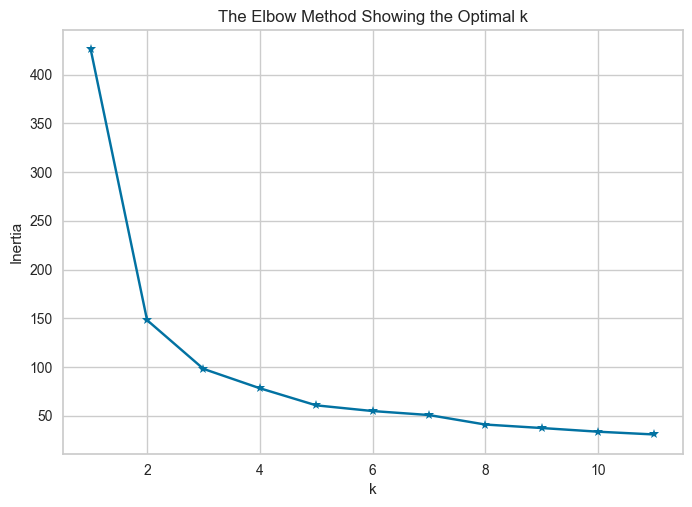

In [9]:
plt.figure(figsize=(16,8))
plt.figure()
plt.plot(K, distortions, 'b*-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method Showing the Optimal k')
plt.show()

Potential optimal k: 2, 3, 5, 8

## SILHOUETTE METHOD

For k=2, the average silhouette score is 0.682173404410761
For k=3, the average silhouette score is 0.5750826759203542
For k=4, the average silhouette score is 0.5300422830250388
For k=5, the average silhouette score is 0.5620921782350367
For k=6, the average silhouette score is 0.5146019422267234
For k=7, the average silhouette score is 0.4127817110456012


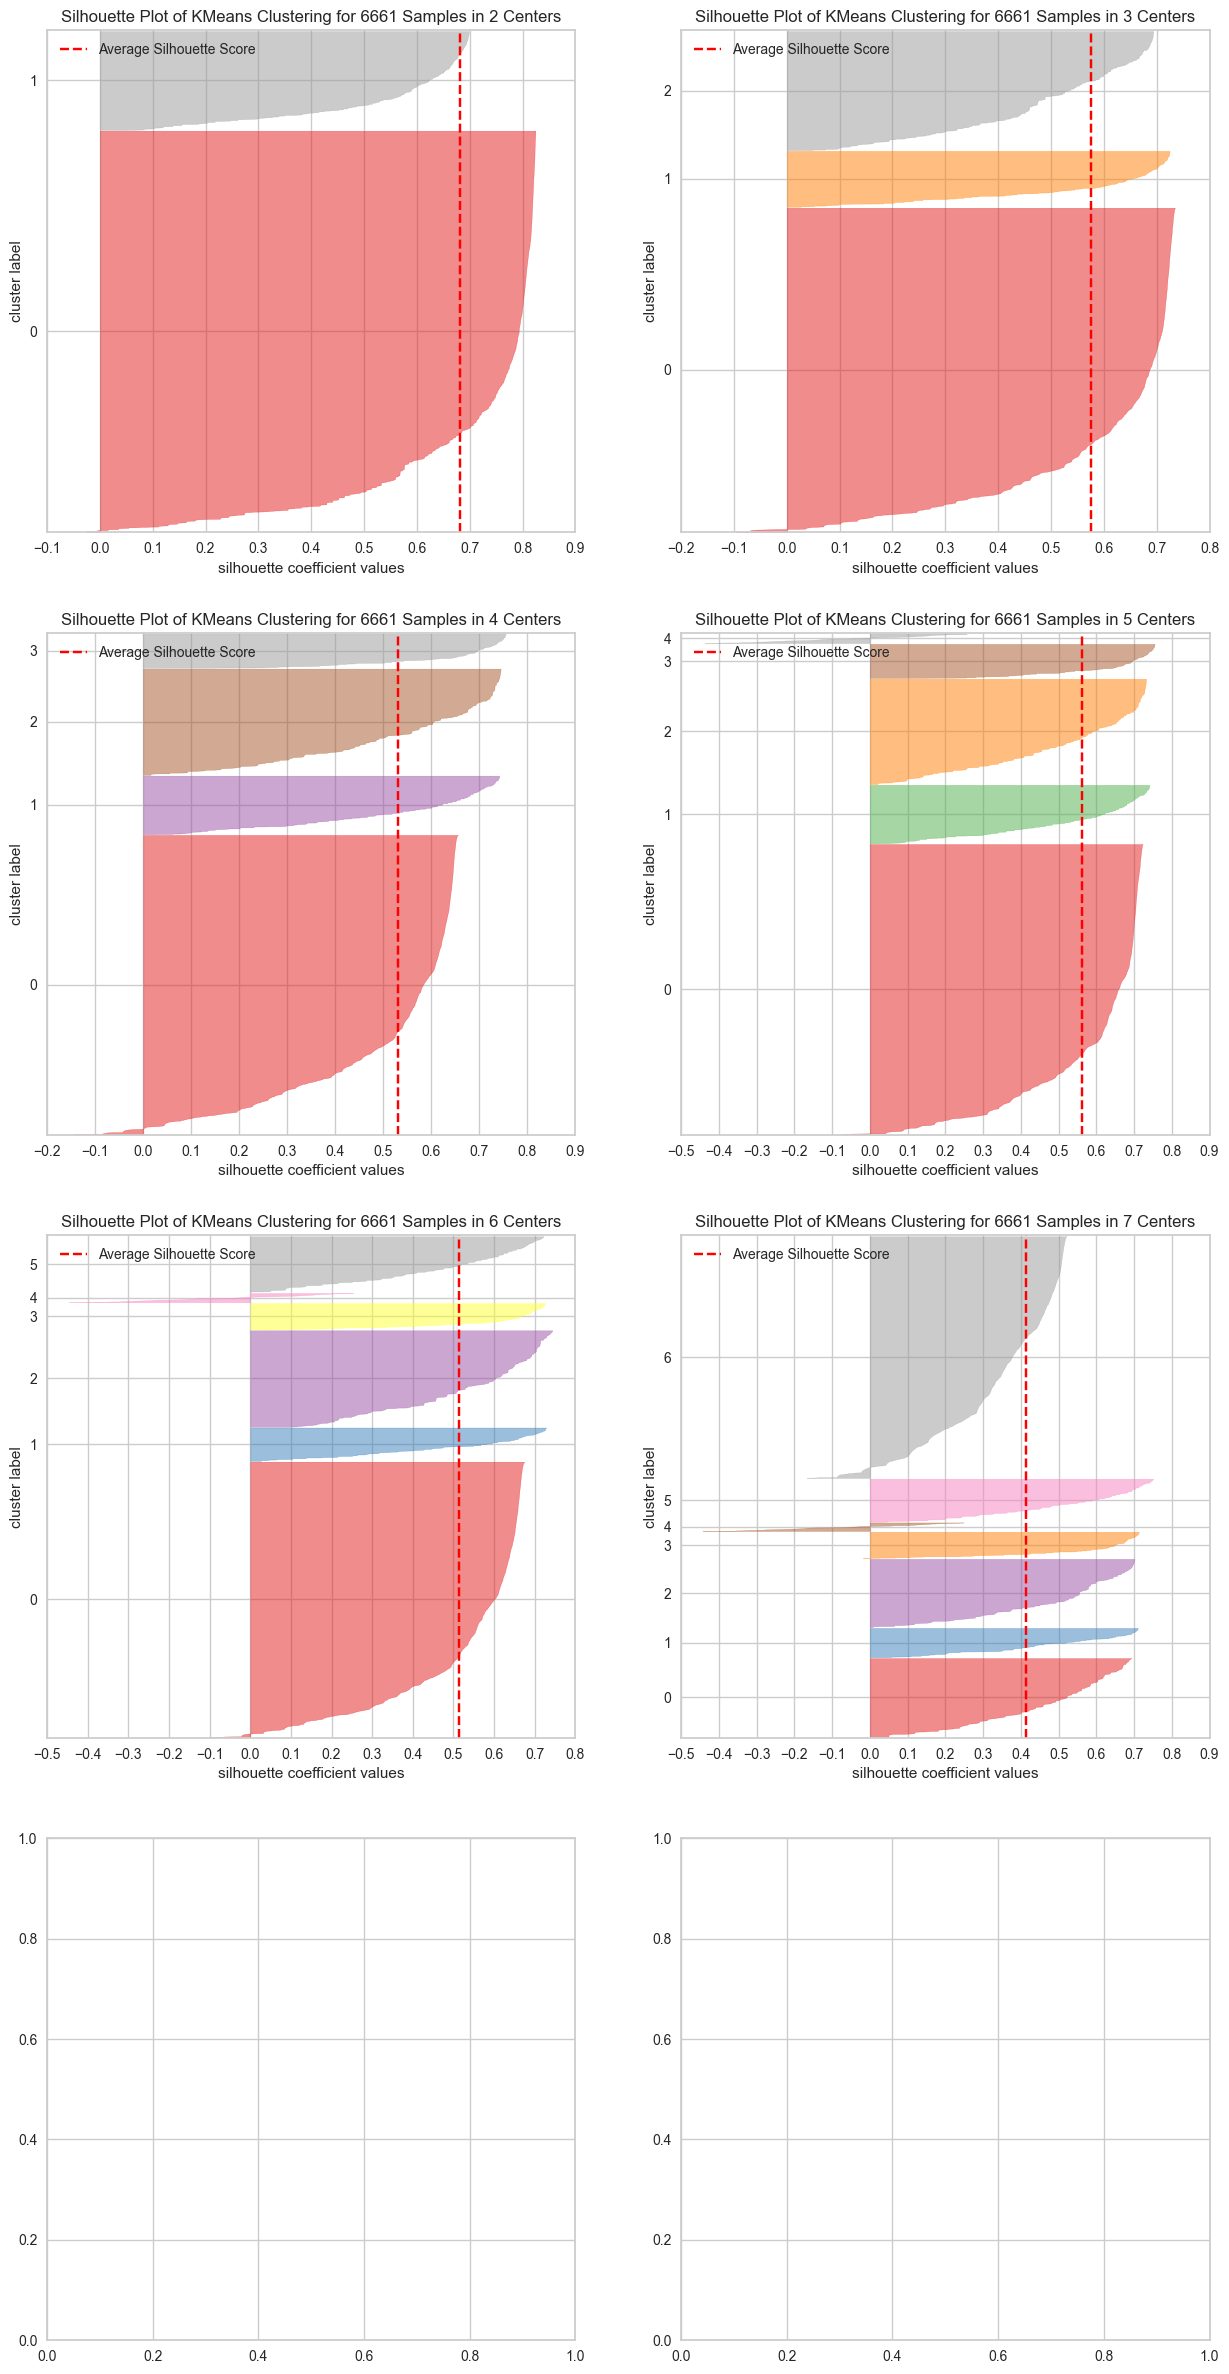

In [10]:
K = range(2,8)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = KMeans(n_clusters, random_state = 1000, n_init='auto')

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(dfos_cs)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

Let's go k=3 (fine silhouette plot, second highest silhouette score, business-wise better than k=2)

## K-MEANS CLUSTERING

In [11]:
# First, we create final dataset with 3 cluster labels
cluster_model = KMeans(n_clusters = 3, random_state = 1000, n_init='auto')
cluster_model.fit(dfos_cs)

KMeans(n_clusters=3, random_state=1000)

In [12]:
# Create a copy of the initial df and assign each accounts to a cluster
dfos_cl = dfos.copy()
dfos_cl['cluster'] = cluster_model.labels_
dfos_cl.head()

,seller_id,last_transaction,recency_day,order_freq,gmv,aov,revenue,voucher_used,voucher_val,buyer_count,num_of_buyer_province,num_of_buyer_city,seller_category,cluster
0,631a50645b9755003d24d6b9,2023-12-08,24,3,205201171,6.840039e+07,1539008,0,0.0,1,1,1,Kecil,0
1,631a50655b9755003d24d78a,2023-12-13,19,5,1651459110,3.302918e+08,8257295,0,0.0,1,1,1,Kecil,0
2,631a50655b9755003d24d7fe,2023-10-26,67,1,105450000,1.054500e+08,790875,0,0.0,1,1,1,Kecil,2
3,631a50675b9755003d24da41,2023-12-22,10,3,275646350,9.188212e+07,2067346,0,0.0,1,1,1,Menengah,0
4,631a50685b9755003d24dd24,2023-12-27,5,1,36874200,3.687420e+07,276556,0,0.0,1,1,1,Menengah,0


In [13]:
dfos_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6661 entries, 0 to 6660
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   seller_id              6661 non-null   object        
 1   last_transaction       6661 non-null   datetime64[ns]
 2   recency_day            6661 non-null   int64         
 3   order_freq             6661 non-null   int64         
 4   gmv                    6661 non-null   int64         
 5   aov                    6661 non-null   float64       
 6   revenue                6661 non-null   int64         
 7   voucher_used           6661 non-null   int64         
 8   voucher_val            6661 non-null   float64       
 9   buyer_count            6661 non-null   int64         
 10  num_of_buyer_province  6661 non-null   int64         
 11  num_of_buyer_city      6661 non-null   int64         
 12  seller_category        6661 non-null   object        
 13  clu

In [14]:
cluster_size = pd.DataFrame(dfos_cl['cluster'].value_counts())
cluster_size.rename(columns={'count': 'NUMBER_OF_SELLERS'}, inplace=True)
cluster_size.index.name = 'cluster'


cluster_size_sorted = cluster_size.sort_index()
cluster_size_sorted

,NUMBER_OF_SELLERS
cluster,
0,4324
1,749
2,1588


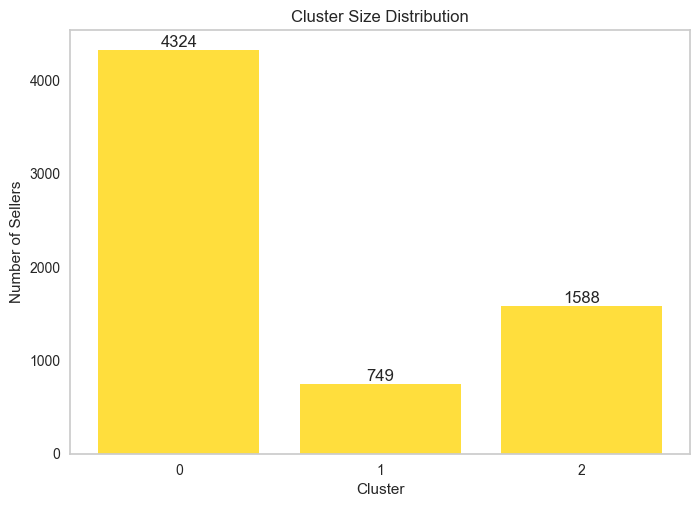

In [15]:
# Sort the DataFrame by index in descending order
cluster_size = cluster_size.sort_index(ascending=False)

# Create the vertical bar plot with yellow color
bars = plt.bar(cluster_size.index, cluster_size['NUMBER_OF_SELLERS'], color='#ffde3dff')

# Add data labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)),
             ha='center', va='bottom')

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Number of Sellers')
plt.title('Cluster Size Distribution')

# Set the x-axis ticks to show only integer values
plt.xticks(cluster_size.index, cluster_size.index, rotation=0)

# Remove grid lines
plt.grid(visible=False)

# Show the plot
plt.show()

In [16]:
# Let's re-look into data after clustering
# This take some time, no worries!
# sns.pairplot(dfos_cl,hue='cluster', diag_kind="hist")

## CLUSTER INTERPRETATION

In [17]:
# Look into averages of values
dfos_clv = dfos_cl.groupby('cluster').mean(numeric_only='True').T

formated_dfos_clv = dfos_clv.map(lambda x: '{:,.2f}'.format(x) if isinstance(x, (int, float)) else x)
formated_dfos_clv

cluster,0,1,2
recency_day,19.45,265.30,114.14
order_freq,35.69,1.25,2.50
gmv,"806,674,838.26","120,319,979.64","108,824,824.49"
aov,"43,286,042.92","107,562,353.08","50,657,927.27"
revenue,"5,305,571.09","473,869.61","637,397.99"
voucher_used,1.16,0.05,0.07
voucher_val,"74,165.32","2,535.78","3,206.01"
buyer_count,7.04,1.07,1.45
num_of_buyer_province,1.80,1.01,1.11
num_of_buyer_city,2.59,1.02,1.18


In [18]:
dfos_clv1 = dfos_cl.groupby('cluster').min(numeric_only='True').T

formated_dfos_clv1 = dfos_clv1.map(lambda x: '{:,.2f}'.format(x) if isinstance(x, (int, float)) else x)
formated_dfos_clv1

cluster,0,1,2
recency_day,1.00,190.00,66.00
order_freq,1.00,1.00,1.00
gmv,"2,000.00","10,000.00","1,101.00"
aov,"1,000.00","10,000.00","1,101.00"
revenue,14.00,75.00,8.00
voucher_used,0.00,0.00,0.00
voucher_val,0.00,0.00,0.00
buyer_count,1.00,1.00,1.00
num_of_buyer_province,0.00,0.00,0.00
num_of_buyer_city,0.00,0.00,0.00


In [19]:
dfos_clv2 = dfos_cl.groupby('cluster').max(numeric_only='True').T

formated_dfos_clv2 = dfos_clv2.map(lambda x: '{:,.2f}'.format(x) if isinstance(x, (int, float)) else x)
formated_dfos_clv2

cluster,0,1,2
recency_day,74.00,363.00,189.00
order_freq,"3,686.00",5.00,19.00
gmv,"47,901,480,169.00","44,990,400,000.00","6,986,545,370.00"
aov,"5,229,200,000.00","44,990,400,000.00","6,255,300,000.00"
revenue,"332,274,573.00","112,476,000.00","17,466,362.00"
voucher_used,859.00,3.00,7.00
voucher_val,"42,863,250.00","454,000.00","500,000.00"
buyer_count,"1,133.00",4.00,9.00
num_of_buyer_province,31.00,2.00,4.00
num_of_buyer_city,121.00,3.00,5.00


In [20]:
dfos_clv3 = dfos_cl.groupby('cluster').median(numeric_only='True').T

formated_dfos_clv3 = dfos_clv3.map(lambda x: '{:,.2f}'.format(x) if isinstance(x, (int, float)) else x)
formated_dfos_clv3

cluster,0,1,2
recency_day,17.00,263.00,108.00
order_freq,9.00,1.00,2.00
gmv,"113,620,720.00","4,572,725.00","15,495,000.00"
aov,"10,180,096.72","3,955,000.00","7,216,572.50"
revenue,"852,153.50","34,295.00","116,212.50"
voucher_used,0.00,0.00,0.00
voucher_val,0.00,0.00,0.00
buyer_count,2.00,1.00,1.00
num_of_buyer_province,1.00,1.00,1.00
num_of_buyer_city,1.00,1.00,1.00


## SAVE CLUSTER RESULT TO PICKLE AND CSV

In [21]:
# After knowing the characteristics for each cluster, I named each clusters
dfos_cl_name = dfos_cl.copy()
# Mapping dictionary
cluster_names = {0: 'Hyper-Active Seller', 1: 'Big Order Occasional Seller', 2: 'Seasonal Seller'}
# Create the cluster_name column by mapping values from the cluster column
dfos_cl_name['cluster_name'] = dfos_cl['cluster'].map(cluster_names)
dfos_cl_name.head(10)

,seller_id,last_transaction,recency_day,order_freq,gmv,aov,revenue,voucher_used,voucher_val,buyer_count,num_of_buyer_province,num_of_buyer_city,seller_category,cluster,cluster_name
0,631a50645b9755003d24d6b9,2023-12-08,24,3,205201171,6.840039e+07,1539008,0,0.0,1,1,1,Kecil,0,Hyper-Active Seller
1,631a50655b9755003d24d78a,2023-12-13,19,5,1651459110,3.302918e+08,8257295,0,0.0,1,1,1,Kecil,0,Hyper-Active Seller
2,631a50655b9755003d24d7fe,2023-10-26,67,1,105450000,1.054500e+08,790875,0,0.0,1,1,1,Kecil,2,Seasonal Seller
3,631a50675b9755003d24da41,2023-12-22,10,3,275646350,9.188212e+07,2067346,0,0.0,1,1,1,Menengah,0,Hyper-Active Seller
4,631a50685b9755003d24dd24,2023-12-27,5,1,36874200,3.687420e+07,276556,0,0.0,1,1,1,Menengah,0,Hyper-Active Seller
5,631a50695b9755003d24ddb4,2023-11-15,47,2,125058150,6.252908e+07,937935,0,0.0,2,2,2,Kecil,0,Hyper-Active Seller
6,631a506a5b9755003d24dfdb,2023-04-19,257,1,68376000,6.837600e+07,512820,0,0.0,1,1,1,Kecil,1,Big Order Occasional Seller
7,631a506a5b9755003d24e040,2023-11-03,59,1,2220000,2.220000e+06,16650,0,0.0,1,1,1,Menengah,0,Hyper-Active Seller
8,631a506a5b9755003d24e06b,2023-12-05,27,5,394444200,7.888884e+07,2958330,0,0.0,2,1,1,Kecil,0,Hyper-Active Seller
9,631a506a5b9755003d24e06d,2023-12-28,4,34,2500908662,7.355614e+07,18756807,0,0.0,14,10,12,Kecil,0,Hyper-Active Seller


In [22]:
# Save dfos_cl_name as a pickle file
dfos_cl_name.to_pickle('pickles/dfos_cl_name.pkl')

# Save dfos_cl_name as a csv file
dfos_cl_name.to_csv('../__dataset/user_seller_active_clustered.csv')

In [32]:
dfos_cl_0_hyper = dfos_cl_name[dfos_cl_name['cluster'] == 0].copy()
dfos_cl_1_occasional = dfos_cl_name[dfos_cl_name['cluster'] == 1].copy()
dfos_cl_2_seasonal = dfos_cl_name[dfos_cl_name['cluster'] == 2].copy()


In [33]:
dfos_cl_0_hyper.to_pickle('pickles/dfos_cl_0_hyper.pkl')
dfos_cl_0_hyper.to_csv('../__dataset/user_seller_active_hyper.csv')

dfos_cl_1_occasional.to_pickle('pickles/dfos_cl_1_occasional.pkl')
dfos_cl_1_occasional.to_csv('../__dataset/user_seller_active_occasional.csv')

dfos_cl_2_seasonal.to_pickle('pickles/dfos_cl_2_seasonal.pkl')
dfos_cl_2_seasonal.to_csv('../__dataset/user_seller_active_seasonal.csv')